# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [2]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

#### Answer: 

- Principal Component Analysis (PCA) is a type of unsupervised learning algorithm that helps solve for the curse of dimensionality. It is used to pre-process original data to reduce dimension but retain as much information as possible. It seeks to capture directions with the most vairance. 


### 2: What are some reasons to use PCA?

#### Answer: 

- PCA can improve classification and regression by helping with the curse of dimensionality.
- It also helps with underfitting.
- PCA can help with visualizing the strucutre of large datasets by limiting them to 2-3 dimensions.


### 3: Why is scaling important for PCA?

#### Answer: 

- Without scaling, one feature can dominate PCA, rendering its results not useful.


### 4: How can one determine how many principle components to use in a model?

#### Answer: 

- You only want 2-3 max to ensure interpretability.


## PCA in Code

### Set Up

In [3]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- Standardize data using StandardScaler or something else
- Select number of principle components

In [10]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [16]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### 7: How Much Variance is Explained by the First 2 Components?

In [17]:
# Code here to answer the question
explained_variances = pca.explained_variance_ratio_
print(explained_variances)

[0.44272026 0.18971182]


In [18]:
explained_variances[0] + explained_variances[1]

0.6324320765155937

#### Answer:

- 63%


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

#### Answer:

- First it chooses random cluster centers
- Second it finds the mean of the data at the cluster centers
- Third it updates centroid based on information loss


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Answer:

- The cost function is known as inertia. It measures how well the data-set was clustered using K-Means.
- K-Means uses inertia to determine the best estimator by minimizing the inertia between a data point and the centroid. Inertia decreases sharply until it hits optimal cluster count.


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

#### Answer:

- We can use the silhouette coefficient.
- It measures cohesiveness of clusters, i.e. the average distance between data points in a cluster vs the distance between these data points and others in other clusters.
- Inertia only focuses on intra-cluster distance while silhouette coefficient measures intra and inter cluster distance.


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [19]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- We need to scale the data.


In [20]:
# Code to preprocess the data
# Name the processed data X_processed
X_processed = scaler.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [35]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [36]:
# Fit the object
cluster = AgglomerativeClustering(n_clusters=2)  
cluster_labels = cluster.fit_predict(X_processed)

In [40]:
# Calculate a silhouette score
score = sklearn.metrics.silhouette_score(X_processed, cluster_labels)
score

0.5770346019475989

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [47]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    cluster = AgglomerativeClustering(n_clusters=n)
    cluster_labels = cluster.fit_predict(data)
    
    # Print the silhouette score
    score = sklearn.metrics.silhouette_score(data, cluster_labels)
    print(f"This is the silhouette score:{score}")
    
    # Return the labels attribute from the fit clustering model
    return(cluster_labels)

In [48]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

This is the silhouette score:0.5770346019475989
This is the silhouette score:0.446689041028591
This is the silhouette score:0.4006363159855973
This is the silhouette score:0.33058726295230545
This is the silhouette score:0.3148548010051283
This is the silhouette score:0.316969830299128
This is the silhouette score:0.310946529007258


# 3) Time Series

In [57]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- We want to convert our "Month" column into date-time format and make it the index


In [58]:
# Code here 
ap["Month"] = pd.to_datetime(ap["Month"])
ap = ap.set_index("Month")
ap

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### 15: Explore Patterns in the Data

First: what kinds of patterns can one find in time series data?

- Trends
- Seasonality
- Cycles
- Irregularity


Second, plot this time series data. What kinds of patterns do you see in this dataset?

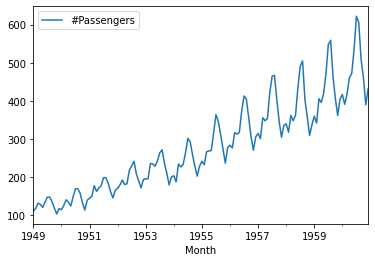

In [63]:
# Code to plot the time series
import seaborn as sns

ap.plot();

We're seeing an upward trend as well as a seasonl pattern that looks to be about a year long.

### 16: Explore the Moving Average

What window would make sense to use for this data?

- A year, since that seems to be the range of the cycle.


In [66]:
# Code to create the moving average
ap["rolling_mean"] = ap['#Passengers'].rolling(12).mean()

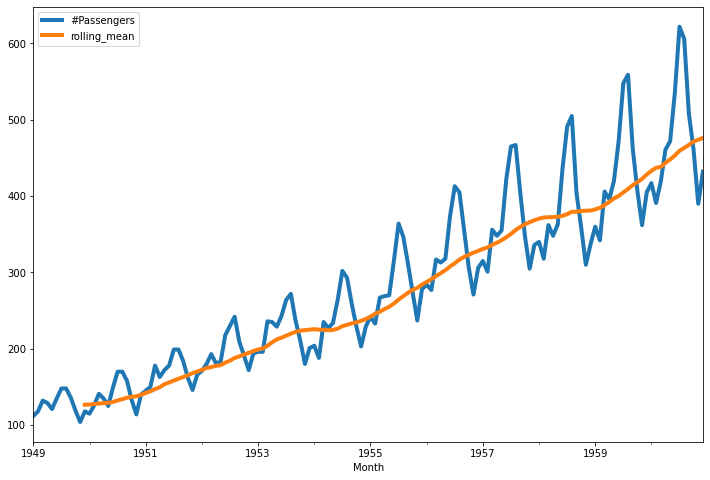

In [67]:
# Add to the moving average to the above plot
ap[['#Passengers', 'rolling_mean']].plot(figsize = (12,8), linewidth = 4)
plt.show()

### 17: Explore Stationarity


Why do we try to make our data stationary?

- It allows us to better predict what will happen next.


What can we do to make our data stationary?

- Transform it with log or square root transformations.
- Subtract the rolling mean
- Differencing
- Decomposition


### 18: Check Stationarity

In [72]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller
dft = adfuller(ap["#Passengers"])
dft[1] < 0.5

False

Not stationary.

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [80]:
# Code here to try to make the data stationary
data_transform = pd.Series(np.sqrt(ap["#Passengers"]))
rolmean = data_transform.rolling(window=4, center=False).mean()
data_minus_rolmean = data_transform - rolmean
data_minus_rolmean.dropna(inplace=True)

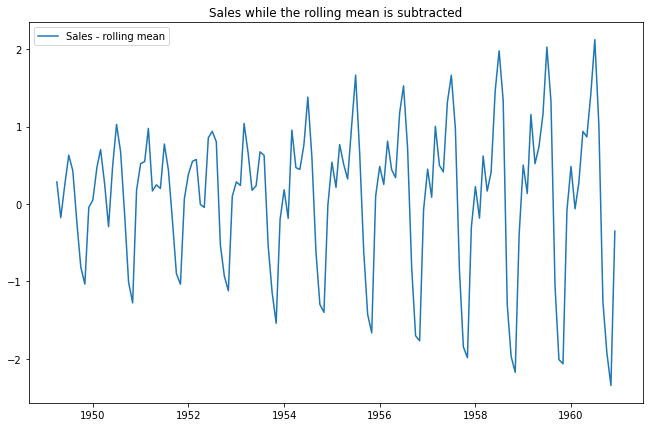

In [81]:
fig = plt.figure(figsize=(11, 7))
plt.plot(data_minus_rolmean, label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

In [82]:
# Code here to check if the data is stationary
dftest = adfuller(data_minus_rolmean)
dftest[1] < 0.5

True

Stationary.

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [83]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

#### Answer:

1. Lowercase and remove stopwords
2. Tokenize
3. Stem/Lemmatize

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

#### Answer:

- Each unique word would be a column, each sentence would be a row. Every time the word appears in the sentence, a 1 is put under that column for that row.


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- TF-IDF stands for Term Frequency - Inverse Document Frequency
- It's an algorithm that uses the frequency of a word to determine the relevance of that word in the document


## NLP in Code

### Set Up

In [84]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [85]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [86]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
y = policies["candidate"]
X = policies["policy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [87]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
# Instantiate it
cvz = CountVectorizer(min_df = 0.05, max_df = 0.95)

In [90]:
# Fit it
cvz.fit(X_train)

CountVectorizer(max_df=0.95, min_df=0.05)

### 24: Vectorize Your Text, Then Model

In [91]:
# Code here to transform train and test sets with the vectorizer
X_train = cvz.transform(X_train)
X_test = cvz.transform(X_test)

In [94]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
# Code here to evaluate your model on the test set
from sklearn.metrics import accuracy_score
prediction = rfc.predict(X_test)
accuracy_score(y_test, prediction)

0.9298245614035088